In [81]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(22,8.27)})

# Explaination

*Experiment**

I wanted to compare whether FedAvg was actually making a performance improvement when compared to a situation where each client trained their model locally without communicating with the "outside world". As such I trained, [100 clients that only use their local data](https://tensorboard.dev/experiment/PnQej97SRAOs0G09vaSYrQ/#scalars&runSelectionState=eyIuIjp0cnVlLCJBYXBhY21hbl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJBYXBhY21hbl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiQWtlbWlTZW5fbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiQWtlbWlTZW5fbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIkFsZWtlc2FtMTk3NV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJBbGVrZXNhbTE5NzVfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsI1kF0dGl0dWRlQWRqdXN0ZXJfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiQXR0aXR1ZGVBZGp1c3Rlcl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiQXduRWxtaW5nX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkF3bkVsbWluZ19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiQmFkTW9vblJvc2luX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkJhZE1vb25Sb3Npbl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiQmFubmFrYWZmYWxhdHRhMV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJCYW5uYWthZmZhbGF0dGExX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJCYXJyb25fQ3liZXJfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiQmFycm9uX0N5YmVyX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJCdWRnZXRfU2hpZnRfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiQnVkZ2V0X1NoaWZ0X2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJCdXJjaFNtaXRoX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkJ1cmNoU21pdGhfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIkNhbm5vbnNob3AxX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkNhbm5vbnNob3AxX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJDYXB0YWluSmluZ2xlc19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJDYXB0YWluSmluZ2xlc19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiQ29zbW8tRE5BX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkNvc21vLUROQV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiRGFuZ2Vyb3VzX1dpc2hib25lX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkRhbmdlcm91c19XaXNoYm9uZV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiRGFydGhSb2FjaF9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJEYXJ0aFJvYWNoX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJEZXRvbmF0cmVzc19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJEZXRvbmF0cmVzc19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiRHJhemlCbGFja19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJEcmF6aUJsYWNrX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJFcHNpbG9uMTA5X2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkVwc2lsb24xMDlfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIkZpcnN0Y2xhc3MzMF9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJGaXJzdGNsYXNzMzBfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIkZsdWZmeUJsaXp6YXJkX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkZsdWZmeUJsaXp6YXJkX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJHdW4tbnV0MDUwOF9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJHdW4tbnV0MDUwOF9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiSGlua2xld29vZF9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJIaW5rbGV3b29kX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJIeXBlcnNhcGllbl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJIeXBlcnNhcGllbl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiSUxpa2VBbGxUaGluZ3NfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiSUxpa2VBbGxUaGluZ3NfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIklnbml0dXMxX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIklnbml0dXMxX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJKb2huUUtfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiSm9oblFLX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJKdW5reWFyZFNhbV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJKdW5reWFyZFNhbV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiS2F6aWFfVGhvcm5oaWxsX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkthemlhX1Rob3JuaGlsbF9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiS2V2aW5Db3dfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiS2V2aW5Db3dfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIkxpbnV4Q2hhcm1zX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIkxpbnV4Q2hhcm1zX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJMb25lbHlNYWNoaW5lc19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJMb25lbHlNYWNoaW5lc19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiTWFuYXRlZTAxX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIk1hbmF0ZWUwMV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiTWlzdGVyQ29mZmVlRG9udXRfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiTWlzdGVyQ29mZmVlRG9udXRfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIk5vdGFSdXNzaWFuQm90MTAxMTBfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiTm90YVJ1c3NpYW5Cb3QxMDExMF9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiT29sb25nT29sb25nT29sb25nX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIk9vbG9uZ09vbG9uZ09vbG9uZ19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiUE1uZXdiX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlBNbmV3Yl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiUG92ZXJsb2FkMjM3X2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlBvdmVybG9hZDIzN19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiUmlwc3Rpa2VycHJvX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlJpcHN0aWtlcnByb19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiU0NTQW1icm9zZV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJTQ1NBbWJyb3NlX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJTS19Nb29zZV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJTS19Nb29zZV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiU2FuaXR5SXNPcHRpb25hbF9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJTYW5pdHlJc09wdGlvbmFsX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJTYXZhZ2VtYXdfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiU2F2YWdlbWF3X2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJTaHJlZGRlckNyX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlNocmVkZGVyQ3JfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIlNpbGVudFJlYmVsMzhfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiU2lsZW50UmViZWwzOF9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiU2lyU3dhbXBHZXJtYW5fbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiU2lyU3dhbXBHZXJtYW5fbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIlNtYWNwYXRzMTExMTExX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlNtYWNwYXRzMTExMTExX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJTbmFwc2hvdDUyX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlNuYXBzaG90NTJfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIlN3aWNodHNfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiU3dpY2h0c19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiVGhlQ3JpbXNvbkRvbGxfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiVGhlQ3JpbXNvbkRvbGxfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIlRoaW5rRnJlZV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJUaGlua0ZyZWVfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIlRvZXN5VG9lTmFpbHNfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiVG9lc3lUb2VOYWlsc19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiVU1QQl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJVTVBCX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJWYUFUQ19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJWYUFUQ19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiV2hhcHBpbmd0aW1lX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIldoYXBwaW5ndGltZV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiWmlkbGVyX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIlppZGxlcl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiX2Vvd3luX19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJfZW93eW5fX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJhYmFvYWJhbzIwMTBfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiYWJhb2FiYW8yMDEwX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJhZ25vc3RpY19zY2llbmNlX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImFnbm9zdGljX3NjaWVuY2VfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsImFsZWF0b3JpYW1lbnRlbWVudGVfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiYWxlYXRvcmlhbWVudGVtZW50ZV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiYXp5cnJfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiYXp5cnJfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsImJhZGdlcmZ1X2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImJhZGdlcmZ1X2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJiYW5uZWRldmVyeXdoZXJleW9fbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiYmFubmVkZXZlcnl3aGVyZXlvX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJiZWFuaXR0b19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJiZWFuaXR0b19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiYm1vbmV5ODMxX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImJtb25leTgzMV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiYnJpYW5kdDc1X2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImJyaWFuZHQ3NV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiYnVja2xleXNjaGFuY2VfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiYnVja2xleXNjaGFuY2VfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsImJ1bGxkb2dkaXZlcl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJidWxsZG9nZGl2ZXJfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsImNoaWxkLW9mLXdyYXRoX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImNoaWxkLW9mLXdyYXRoX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJjb25hbGZpc2hlcl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJjb25hbGZpc2hlcl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiZGFya2NhbGxpbmdfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiZGFya2NhbGxpbmdfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsImRlcmdsX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImRlcmdsX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJlbGVhbmFfYmVfaGFwcHlfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiZWxlYW5hX2JlX2hhcHB5X2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJlcnJhdGljYWxseV9zcG9yYWRpY19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJlcnJhdGljYWxseV9zcG9yYWRpY19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiZm9udGluYWxpc19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJmb250aW5hbGlzX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJnYWJyaW90X2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImdhYnJpb3RfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsImdyYWNlZnVsaGlsbHNfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwiZ3JhY2VmdWxoaWxsc19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwiaW1hZGRpY3RlZHRvZmlmYV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJpbWFkZGljdGVkdG9maWZhX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJsYW42MDAwMF9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJsYW42MDAwMF9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwibGFwdG9wZHJhZ29uX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsImxhcHRvcGRyYWdvbl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwibG9raV9yYWNlcl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJsb2tpX3JhY2VyX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJtYXBzYWxfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwibWFwc2FsX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJtY3NtYWNraW5ndG9uX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIm1jc21hY2tpbmd0b25fbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIm1tbXRoYXRzYXNwaWN5cGVwcGVyX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIm1tbXRoYXRzYXNwaWN5cGVwcGVyX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJueWFuYXNhZ2FyYV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJueWFuYXNhZ2FyYV9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwibnlnaWJzX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIm55Z2lic19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwib21pbm91c2dyYXljYXRfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwib21pbm91c2dyYXljYXRfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsIm9yYW5nZXRhbmdlcmluZV9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJvcmFuZ2V0YW5nZXJpbmVfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsInBhc3N0aGVwYXNzMl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJwYXNzdGhlcGFzczJfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsInBlZXBlZXRyYWluX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsInBlZXBlZXRyYWluX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJwb29wZWVkb29wX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsInBvb3BlZWRvb3BfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsInF1ZW1hc3BhcmNlX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsInF1ZW1hc3BhcmNlX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJyZXRyb3Ryb25pY2FfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwicmV0cm90cm9uaWNhX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJyb2dlcnNrb2xlcl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJyb2dlcnNrb2xlcl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwic2VicmViY19sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJzZWJyZWJjX2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJzcGV0c25hdHpfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwic3BldHNuYXR6X2xvc3Nlc190cmFpbl9sb3NzIjp0cnVlLCJzdXBlcmNvdzM3Nl9sb3NzZXNfdGVzdF9sb3NzIjp0cnVlLCJzdXBlcmNvdzM3Nl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwidHJhaW5zcGhvYmljX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsInRyYWluc3Bob2JpY19sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwid2FsbHN0cmVldGJldHNHUFQyX2xvc3Nlc190ZXN0X2xvc3MiOnRydWUsIndhbGxzdHJlZXRiZXRzR1BUMl9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZSwid2hhdHdvb3dfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwid2hhdHdvb3dfbG9zc2VzX3RyYWluX2xvc3MiOnRydWUsInllMWxfbG9zc2VzX3Rlc3RfbG9zcyI6dHJ1ZSwieWUxbF9sb3NzZXNfdHJhaW5fbG9zcyI6dHJ1ZX0%3D). These are the same clients that participated in a Federated Learning experiment, with the same test-train split. I compare each client's test accuracy when they train locally and when the participate in FL.  

### Gotchas
- I use the metrics of the Federated Learning model before divergence, (Round 400 of the one-epoch-per-round experiment), 
- The test accuracy after 100 epochs of local training is considered. Looking at the local training however, we see that the local model for most of the clients has already overfit to the training data, hence the test accuracy has begun to decrease. This is alright as an intial experiment as we know that under optimal training, each client might have at most upto 5% higher test accuracy. 

### Results
Unlike what we see in [Salvaging Federated Learning](https://arxiv.org/pdf/2002.04758.pdf) FedAvg actually lifts the model accuracy when compared with local training when considering non-outliers. This could be because my experiment considers 100 clients each with 1600 tokens while Tao Yu et. al. consider 80,000 participants (i.e., Reddit users) who have between 150 and 500 posts. 
We also see that outliers clearly have training / testing data that is quite different from the other clients. Once outliers are removed we see a improvement of 6% ~ 16% on test accuracy.

# Federated Improvement over Local Training

In [3]:
E_1 = pd.read_csv('METRICS_clients_100_q_100_epoch_1_lr_0.01.csv', header=[0,1])

In [54]:
local_training = pd.read_csv('benchmark_local_tests_lr_002_e_100.csv')

In [80]:
list(local_training['Unnamed: 0']) == list(E_1['pre_test_acc'])

True

In [56]:
fl_improvement = E_1['pre_test_acc'].loc[400].values - local_training['acc'].values

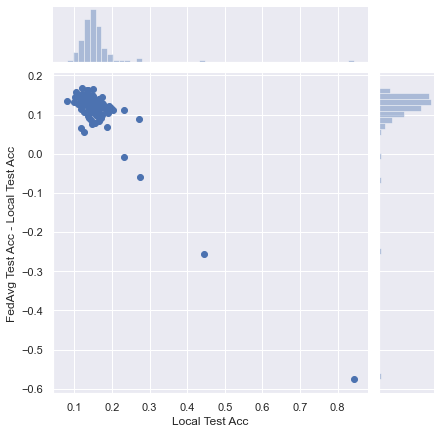

In [76]:
h = sns.jointplot(x=local_training['acc'].values, y=fl_improvement)
h.set_axis_labels('Local Test Acc','FedAvg Test Acc - Local Test Acc')

## Outliers

In [58]:
outliers = set(pd.Series(list(E_1['pre_test_acc']))[fl_improvement < 0])
outliers

{'ShredderCr', 'aleatoriamentemente', 'dergl', 'spetsnatz'}

## Example Data of Outliers

`spetsnatz`: "Sem dúvida. E na minha opinião grande parte do sucesso da PS2 (a consola mais vendida da história) foi o legado deixado pela PS1 que elevou a fasquia das consolas.  Tenho pena da nova dinâmica do mercado dos jogos hoje em dia, o medo em arriscar e a ânsia de espremer a monetização ao máximo tudo para agradar accionistas dos grandes estúdios.  É verdade que nunca foi tão fácil lançar um jogo e o mercado indie está melhor do que nunca, mas tenho saudades de uma altura em que grandes estúdios arriscavam com ideias originais, estes estúdios tinham capacidade financeira para lançar jogos bem mais polidos. Por exemplo, até a EA lançava jogos experimentais como o Future Cop: LAPD, outro dos meus preferidos para a PS1."

`ShredderCr`: "Your post has been removed from /r/ClashRoyale because an active thread for this already exists. We appreciate your post but this would be better suited as a comment on one of the threads that are currently discussing this. Starting a new thread on the same subject as an existing one just dilutes the discussion.  Any questions, [message the mods](https://www\.reddit\.com/message/compose?to=%2Fr%2F{subreddit}&amp;amp;subject=about my removed {kind}&amp;amp;message=I'm writing to you about the following {kind}: {url}. %0D%0DMy issue is...). [subreddit rules](https://www.reddit.com/r/ClashRoyale/wiki/rules) | [reddiquette](/wiki/reddiquette) | [reddit's rules](/wiki/rules) | [new to reddit?](/wiki/reddit101)"

`dergl`: "**Grant Haley**  57.6 Overall (84.5 Run Defense, 81.6 Tackling, 58.4 Pass Rushing, 46.3 Coverage)  - 0 Pressures on 1 Pass Rushing Snap - 4 Tackles - 3 Defensive Stops - 3 Catches Allowed on 3 Targets (15 Coverage Snaps) - 45 Yards Allowed (31 YAC) - 1 TD Allowed - 2 1st Downs Allowed (Including TD)  Ballantine did not play on defense, but had a 61.4 S/T grade and a 71.8 Return Grade.  - 2 Returns - 2 Kickoff Returns for 76 Yards"

`aleatoriamentemente`: "Espero que ele se retire da política depois disso, ficou claro que ele não tem saúde pra isso, torço pra que se recupere e vá pra Flórida aproveitar o tempo que lhe resta neste mundo."


# Improvement After Removing Outliers

In [66]:
outlier_idx = [client not in outliers for client in E_1['pre_test_acc'].loc[400].index]

fed_acc = E_1['pre_test_acc'].loc[400].values[outlier_idx]
local_acc = local_training['acc'].values[outlier_idx]

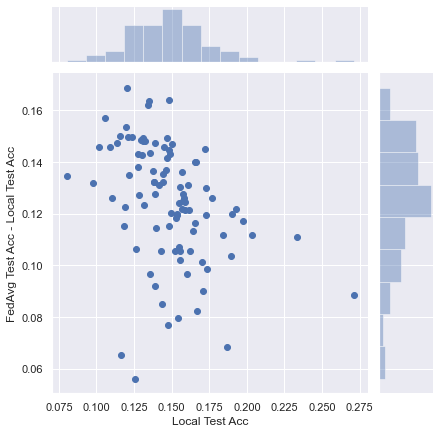

In [77]:
h = sns.jointplot(x=local_acc, y=fed_acc - local_acc)
h.set_axis_labels('Local Test Acc','FedAvg Test Acc - Local Test Acc')